> 作者：Emmanuelle Gouillart、Didrik Pinte、Gaël Varoquaux 和 Pauli Virtanen

本章给出关于Numpy概述，Numpy是Python中高效数值计算的核心工具。

### 1.3.1 Numpy array对象

#### 1.3.1.1 什么是Numpy以及Numpy array?

##### Numpy array
 
 | 对象 | 特点|
 |:------|:-----|
 |**Python对象：** | <ul><li>高级数值对象：整数、浮点 </li><li> 容器：列表（无成本插入和附加），字典（快速查找）</li></ul>|
 |**Numpy提供：** | <ul><li>对于多维数组的Python扩展包</li><li>更贴近硬件（高效）</li><li>为科学计算设计（方便）</li><li>也称为*面向数组计算*</li></ul>|

In [1]:
import numpy as np
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

例如，一个array中包含：

* 实验或模拟在离散时间阶段的值
* 测量设备记录的信号，比如声波
* 图像的像素、灰度或颜色
* 用不同X-Y-Z位置测量的3-D数据，例如MRI扫描
* ...

**为什么有用：**因为它提供了高速数值操作的、节省内存的容器。

In [2]:
L = range(1000)
%timeit [i**2 for i in L]

10000 loops, best of 3: 93.7 µs per loop


In [3]:
a = np.arange(1000)
%timeit a**2

100000 loops, best of 3: 2.16 µs per loop


##### Numpy参考文档

* 在线文档: http://docs.scipy.org/
* 交互式帮助:

```python
>>> help(np.array)
Help on built-in function array in module numpy.core.multiarray:

  array(...)
     array(object, dtype=None, ...
```

* 查找帮助：

```python
>>> np.lookfor('create array') # doctest: +SKIP
Search results for 'create array'
---------------------------------
numpy.array
   Create an array.
numpy.memmap
   Create a memory-map to an array stored in a *binary* file on disk.
```


In [4]:
np.con*?

np.concatenate
np.conj
np.conjugate
np.convolve


##### import的惯例

推荐导入numpy的惯例是：

```python
>>> import numpy as np
```

#### 1.3.1.2 创建array

##### 手动构建array

* **1-D**：

In [5]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [6]:
a.ndim

1

In [7]:
a.shape

(4,)

In [8]:
len(a)

4

* **2-D, 3-D, ...**：

In [9]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [10]:
b.ndim

2

In [11]:
b.shape

(2, 3)

In [12]:
len(b)     # 返回维度的大小

2

In [13]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [14]:
c.shape

(2, 2, 1)

### **练习：简单array**

* 创建一个简单的二维array。首先，重复上面的例子。然后接着你自己的：在第一行从后向前数奇数，接着第二行数偶数？
* 在这些array上使用函数[len()](http://docs.python.org/2.7/library/functions.html#len)、numpy.shape()。他们有什么关系？与array的`ndim`属性间呢？

##### 用函数创建array

实际上，我们很少一项一项地输入...

* 均匀数据：

In [15]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
b = np.arange(1, 9, 2) # 开始，结束（不包含），步长
b

array([1, 3, 5, 7])

* 或者通过一些数据点：

In [17]:
c = np.linspace(0, 1, 6)   # 起点、终点、数据点
c

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [18]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

* 常用的array：

In [19]:
a = np.ones((3, 3))  # 提示: (3, 3) 是一个tuple
a

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [20]:
b = np.zeros((2, 2))
b

array([[ 0.,  0.],
       [ 0.,  0.]])

In [21]:
c = np.eye(3)
c

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [22]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

* ``np.random``: 随机数 (Mersenne Twister PRNG) :

In [23]:
a = np.random.rand(4)       # 取值为[0, 1]内的uniform(均匀)分布
a

array([ 0.04506247,  0.13787144,  0.38581752,  0.02926018])

In [24]:
b = np.random.randn(4)      # 取值为Gaussian(高斯)分布
b

array([-0.35591965, -0.53299689,  1.94866954,  0.97826793])

In [25]:
np.random.seed(1234)        # 设置随机种子

### **练习：用函数创建array**
* 实验用`arange`、`linspace`、`ones`、`zeros`、`eye`和`diag`。
* 用随机数创建不同类型的array。
* 尝试在创建有随机数的array前设定种子。
* 查看函数`np.empty`的文档。它能做什么？什么时候会比较有用？

#### 1.3.1.3 基本数据类型

你可能已经注意到，在一些情况下，array元素在显示时会带有一个点（即 `2.` 而不是 `2`）。这是因为它使用了不同的数据类型(data-type)：

In [26]:
a = np.array([1, 2, 3])
print(a)
a.dtype

[1 2 3]


dtype('int32')

In [27]:
b = np.array([1., 2., 3.])
print(b)
b.dtype

[ 1.  2.  3.]


dtype('float64')

不同的数据类型让我们能够更紧凑地在内存中存储数据，不过大多数时候我们都只操作浮点数(floating point number)。注意，在上面的例子中，Numpy自动从输入中识别了数据类型。
____

你可以明确指定想使用的数据类型：

In [28]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

**默认**数据类型是浮点:

In [29]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

还有其他的类型：

**complex(复数)**：

In [30]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

**bool(布尔)**：

In [31]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

**string(字符串)**：

In [32]:
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f.dtype     # <--- 所有字符串中，最长的包含了7个字符

dtype('S7')

**更多**：

* int32
* int64
* unit32
* unit64

#### 1.3.1.4 基本的可视化

现在我们有了第一组array，下面我们要对它们进行可视化。

启动IPython:

```
$ ipython
```

或者notebook：

```
$ ipython notebook  # 注：对于更新的版本，应使用 juptypter notebook
```

一旦IPython已经启动，则启用互动式绘图：
```python
>>> %matplotlib
```

或者，如果你是用notebook方式，则在notebook中启用绘图
```python
>>> %matplotlib inline
```

加上`inline`很重要，因为这样图形就在notebook中显示，而不是在一个新窗口中显示.

*Matplotlib*是一个2D制图包。我们可以像这样导入它的各种方法：

In [33]:
import matplotlib.pyplot as plt  #简洁的导入形式

然后通过以下方式来绘图（注意，如果你没有通过`%matplotlib`来启用交互式绘图，那么你必须通过显式的使用 `show` 来显示图形）:

```python
plt.plot(x, y)       # 线形图
plt.show()           # <-- 显示图形（不需要使用交互式绘图）
```

或者，如果你通过`%matplotlib`启用了交互式绘图，则：

```python
plt.plot(x, y)       # 线形图
```

* 1D 作图：

In [34]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # 线形图

In [35]:
plt.plot(x, y, 'o')  # 点图

* 2D array(比如图形):

In [36]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

更多请见[matplotlib部分](http://localhost:8889/notebooks/1.4Matplotlib%EF%BC%9A%E7%BB%98%E5%9B%BE.ipynb)

### **练习**：简单可视化

* 画出一些简单的array：一个以cosine化的时间函数，以及一个2D矩阵.
* 在2D矩阵上尝试使用 `gray` colormap.

##### index(索引)与slice(切片)

array中的项目可以用与其他Python序列（比如：`list`）一样的方式访问和赋值：

In [37]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
a[0], a[2], a[-1]

(0, 2, 9)

**警示**：index从0开始，这与其他的Python序列（以及C/C++）是一致的。与此相对，Fortran或者Matlab中的index从1开始。

array也支持python中反转一个序列的常用方法：

In [39]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

对于多维array，index是由整数构成的tuple：

In [40]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [41]:
a[1, 1]

1

In [42]:
a[2, 1] = 10 # 第3行，第2列
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [43]:
a[1]

array([0, 1, 0])

**注意**：

* 在2D array中，第一个维度对应**行**，第二个维度对应**列**.
* 对于多维度array `a`，`a[0]`被解释为提取所有其它未指定维度的元素.

**slice(切片)**：与其他Python序列一样，array也可以进行切片操作：

In [44]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
a[2:9:3]  # [start:end:step]

array([2, 5, 8])

注意：最末的index不包含在返回值内！：

In [46]:
a[:4]

array([0, 1, 2, 3])

slice中的的三个组成部分(`start`, `end`和`stop`(步长))都不是必须声明的：默认情况下，`start`为0，`end`为最末的index，`step`为1：

In [47]:
a[1:3]

array([1, 2])

In [48]:
a[::2]

array([0, 2, 4, 6, 8])

In [49]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

关于Numpy的index和slice的一个简要的图示...

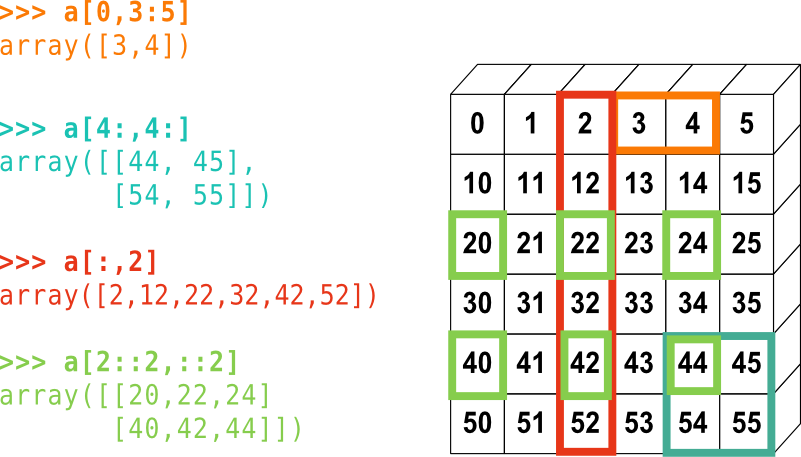</img>

还可以把赋值和slice结合起来：

In [50]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [51]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

### **练习：索引与切片**
* 尝试不同方式的slice，使用`start`, `end`和`step`：从一个linspace开始，试着从后往前获得所有的奇数，从前往后获得所有的偶数.
* 重新生成上面图示中的slice. 你可以使用下列表达式创建这个array：

In [52]:
np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

### **练习：array的创建**

创建下列的array（用正确的数据类型）：

```python
[[1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 6, 1, 1]]

[[0., 0., 0., 0., 0.],
 [2., 0., 0., 0., 0.],
 [0., 3., 0., 0., 0.],
 [0., 0., 4., 0., 0.],
 [0., 0., 0., 5., 0.],
 [0., 0., 0., 0., 6.]]
```

达标标准：用3种不同的方式创建各个array

*提示*：array中的所有单一元素可以像list一样访问，即`a[1]` 或 `a[1, 2]`.

*提示*：查看``diag``的文档.

### **练习：创建平铺array**

查看 ``np.tile`` 的文档，并用该函数创建这个array：

```python
[[4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1],
 [4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1]]
```

#### 1.3.1.6 copy(副本)与view(视图)

slice操作是在原array上创建了一个**view**，它只是访问array数据一种方式。因此，内存中并没有创建原始的array的副本。你可以用 `np.may_share_memory()` 来检查两个array是否共享了同一个内存区块。不过要注意，这种方式的目的在于启发，不要因此产生误解.

**当修改view时，原array也会被修改**：

In [53]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [55]:
np.may_share_memory(a, b)

True

In [56]:
b[0] = 12
b

array([12,  2,  4,  6,  8])

In [57]:
a   # (!)

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [58]:
a = np.arange(10)
c = a[::2].copy()  # c是强制创建的一个副本
c[0] = 12
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
np.may_share_memory(a, c)

False

这种行为乍看可能有些意外...但是这样做能够节约内存和时间。

**实例：素数筛选(prime number sieve)**

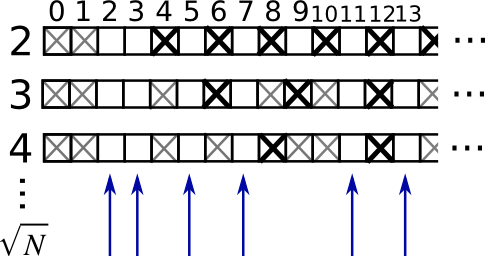</img>

用筛选法（sieve)计算0-99之间的所有素数

* 构建一个形状为`(100,)`的布尔array，命名为`is_prime`，所有元素的初始值都设为`True`：

In [60]:
is_prime = np.ones((100,), dtype=bool)

* 将0和1去掉，因为它们不是素数

In [61]:
is_prime[:2] = 0

对于每个从2开始的整数`j`，去掉它的倍数：

In [62]:
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2*j::j] = False

* 看一下`help(np.nonzero)`，然后打印素数
* 接下来:
    * 将上面的代码放入名为 `prime_sieve.py` 的脚本文件
    * 运行以检查它是否能工作
    * 使用[埃拉托斯特尼筛法(the sieve of Eratosthenes)](http://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)中提出的优化方法:
        1. 跳过已知不是素数的`j`
        1. 第一个应该被去掉的数是$j^2$

#### 1.3.1.7 fancy index(美妙索引)

Numpy array可以用slice(切片)来index(索引)，也可以用布尔或整形array(mask掩码)来index。这个方法也被称为fancy index。注意：fancy index创建的是***原array的copy(副本)而不是view(视图)**。

##### 使用boolean mask(布尔掩码)

In [63]:
np.random.seed(3)
a = np.random.randint(0, 21, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [64]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False], dtype=bool)

In [65]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # 或,  a[a%3==0]
extract_from_a           # 用mask抽取一个子array

array([ 3,  0,  9,  6,  0, 12])

在赋值给子array时，使用mask来进行index是非常有用的：

In [66]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

##### 用整型数组来进行index

In [67]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

索引可以用整型数组来完成，其中相同的index可以重复若干次：

In [68]:
a[[2, 3, 2, 4, 2]]  # 注：这里使用的整形数组 [2, 3, 2, 4, 2] 是一个Python list

array([20, 30, 20, 40, 20])

这种类型的索引可以用来给array中的元素赋予新值：

In [69]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

当通过整型数组索引创建了一个新的array时，新array与整型数组有相同的形状，而不是原array：

In [70]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [71]:
a[idx]

array([[3, 4],
       [9, 7]])

-----------------------------------------
下图展示了各种fancy index的应用
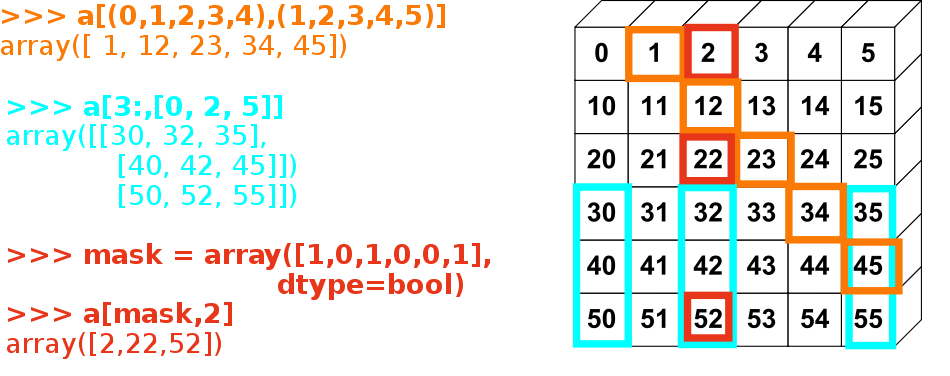</img>

### **扩展练习：fancy index**
* 同前，重新生成上图中所示的fancy index.
* 为array赋值: 表达式左侧使用fancy index，表达式右侧创建array，例如，将上图array中的某些部分设为0.

### 1.3.2 array上的的数值操作

#### 1.3.2.1 元素级操作

##### 基本操作

标量:

In [72]:
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [73]:
2**a

array([ 2,  4,  8, 16], dtype=int32)

所有运算是在元素级别上操作：

In [74]:
b = np.ones(4) + 1
a - b

array([-1.,  0.,  1.,  2.])

In [75]:
a * b

array([ 2.,  4.,  6.,  8.])

In [76]:
j = np.arange(5)
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

当然，这些操作也比你用纯Python实现快得多：

In [77]:
a = np.arange(10000)
%timeit a + 1 

14.6 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [78]:
l = range(10000)
%timeit [i+1 for i in l] 

1.16 ms ± 98.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**注意：array相乘不是矩阵相乘：**

In [79]:
c = np.ones((3, 3))
c * c                   # 不是矩阵相乘！

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

**注：矩阵相乘：**

In [80]:
c.dot(c)

array([[ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.]])

### **练习：元素级别的操作**

* 尝试各种元素级别的简单算术操作
* 用 `%timeit` 比较一下它们与纯Python对等操作的时间差异
* 生成：
    * `[2**0, 2**1, 2**2, 2**3, 2**4]`
    * `a_j = 2^(3*j) - j`

##### 其他操作

* **比较：**

In [81]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True], dtype=bool)

In [82]:
a > b

array([False, False,  True, False], dtype=bool)

array级别的比较：

In [83]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)

False

In [84]:
np.array_equal(a, c)

True

* **logical(逻辑)操作**：

In [85]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False], dtype=bool)

In [86]:
np.logical_and(a, b)

array([ True, False, False, False], dtype=bool)

* **transcendental function([超越函数(可简单理解为非算术类函数)](https://en.wikipedia.org/wiki/Transcendental_function))**

In [87]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [88]:
np.log(a)

array([       -inf,  0.        ,  0.69314718,  1.09861229,  1.38629436])

In [89]:
np.exp(a)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

* **形状不匹配**

In [90]:
a = np.arange(4)
a + np.array([1, 2])  

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

*broadcast?* 我们[稍后](#Broadcasting)讨论.

* **变换**

In [91]:
a = np.triu(np.ones((3, 3)), 1)   # 详见 help(np.triu)
a

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [92]:
a.T

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

**警告：变换是view**

因此，下列的代码是**错误**的，**将不会使矩阵变为对称**：

```python
>>> a += a.T
```

**注：线性代数**

子模块 ``numpy.linalg`` 实施了基础的线性代数运筹，比如求解线性方程组，奇异值分解等。但是，它并不能保证以高效的方式编译，因此，建议使用 `scipy.linalg`, 详细的内容见[线性代数操作](1.5. Scipy：高级科学计算.ipynb)：`scipy.linalg`。

### **练习：其他操作**
* 查看 `np.allclose` 的文档，什么时候这很有用？
* 查看 `np.triu`和 `np.tril`的文档。

#### 1.3.2.2 基础的reduction(简化)操作

##### 求和

In [93]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [94]:
x.sum()

10

行求和与列求和：

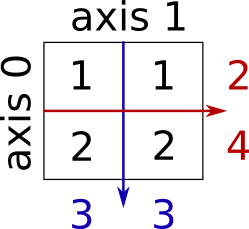</img>

In [95]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [96]:
x.sum(axis=0)   # 列 (第1维度)

array([3, 3])

In [97]:
x[:, 0].sum(), x[:, 1].sum()

(3, 3)

In [98]:
x.sum(axis=1)   # 行 (第2维度)

array([2, 4])

In [99]:
x[0, :].sum(), x[1, :].sum()

(2, 4)

在更高维上，思路是一致的：

In [100]:
x = np.random.rand(2, 2, 2)
x.sum(axis=2)[0, 1]

1.2671177193964822

In [101]:
x[0, 1, :].sum()     

1.2671177193964822

##### 其他简化操作

-- 采取的方式是一致的(也可以使用 `axis=` )

* **极值**

In [102]:
x = np.array([1, 3, 2])
x.min()

1

In [103]:
x.max()

3

In [104]:
x.argmin()  # 最小值的index

0

In [105]:
x.argmax()  # 最大值的index

1

* **逻辑运算**：

In [106]:
np.all([True, True, False])

False

In [107]:
np.any([True, True, False])

True

**注**：可以应于array的比较：

In [108]:
a = np.zeros((100, 100))
np.any(a != 0)

False

In [109]:
np.all(a == a)

True

In [110]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c)).all()

True

* **统计:**

In [111]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

1.75

In [112]:
np.median(x)

1.5

In [113]:
np.median(y, axis=-1) # 最后一个维度

array([ 2.,  5.])

In [114]:
x.std()          # 总体的标准差

0.82915619758884995

... 以及其他更多的操作（最好边学边用）。

###  **练习：简化操作**

* 我们已经知道了有 ``sum`` 函数，你觉得还会有哪些其他的函数？
* ``sum`` 和 ``cumsum`` 有什么区别？

**实例: 数据统计**

[populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt)中的数据描述了过去20年加拿大北部野兔和猞猁的数量（以及胡萝卜）。

你可以看一下数据，比如在某个编辑器，或在IPython中（shell或者notebook）。如果你使用的是linux或mac，可以通过：
```
cat data/populations.txt
```

首先，将数据加载到Numpy array(如果你正在使用ipython notebook，请先将文件populations.txt放在当前文件夹下的data目录下)：

In [115]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T  # 技巧: 将列分配给变量

接下来作图：

In [116]:
%matplotlib inline

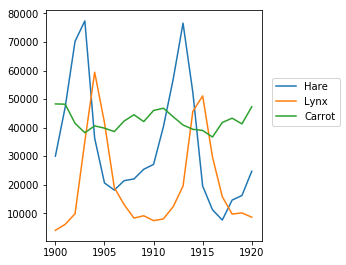

In [117]:
from matplotlib import pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

随时间变化的数量的平均数：

In [118]:
populations = data[:, 1:]
populations.mean(axis=0)

array([ 34080.95238095,  20166.66666667,  42400.        ])

样本的标准差：

In [119]:
populations.std(axis=0)

array([ 20897.90645809,  16254.59153691,   3322.50622558])

每一年哪个物种有最高的数量？：

In [120]:
np.argmax(populations, axis=1)

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2], dtype=int64)

**实例：基于随机游走算法的扩散**

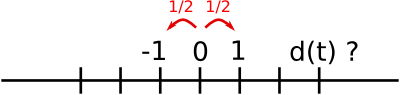</img>

考虑一个简单的1维随机游走过程：在每个时间眇，一个游走者以相等的概率跳到左边或右边。

感兴趣的是游走者在 `t` 次左跳或右跳后距离原点的典型距离？我们将模拟许多“游走者”来找到这个规律，并采用array计算的技巧：我们将创建一个2D array，一个维度为“故事”(每个游走者有一个故事)，一个维度是时间：

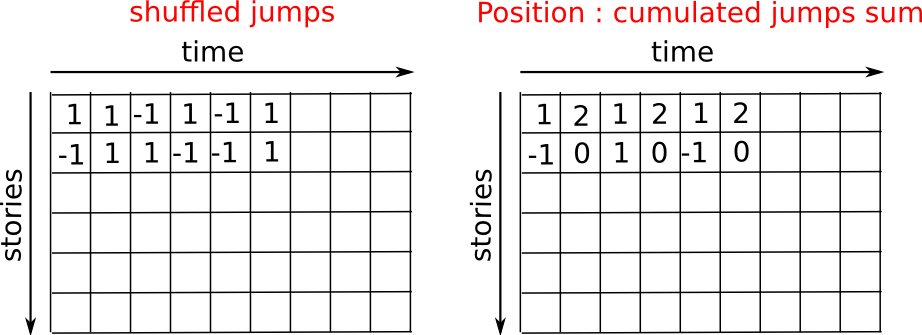</img>

In [121]:
n_stories = 1000 # 游走者的数量
t_max = 200      # 我们纪录行走者踪迹的时间

随机选择所有游走的步长为1或-1：

In [122]:
t = np.arange(t_max)
steps = 2 * np.random.randint(0, 1 + 1, (n_stories, t_max)) - 1 # +1 因为末值不被计入
np.unique(steps) # 验证: 所有步长是1或-1

array([-1,  1])

以时间步维度总和为参照来创建游走

In [123]:
positions = np.cumsum(steps, axis=1) # axis = 1: 时间维度
sq_distance = positions**2

获得故事轴的均值：

In [124]:
mean_sq_distance = np.mean(sq_distance, axis=0)

画出结果：

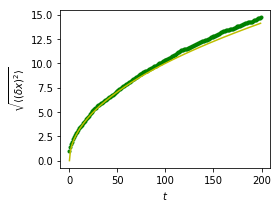

In [125]:
plt.figure(figsize=(4, 3)) 
plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-')
plt.xlabel(r"$t$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$")
plt.tight_layout()  # 为坐标轴的label提供足够的空间

我们找到了物理学中一个著名的结果：距离的均方根随着时间平均根的增长而增长！

<a id='Broadcasting'></a>
#### 1.3.2.3 broadcasting(广播)

* numpy array的基本操作（例如加法）是元素级别的
* 这些操作适用于所有的array的大小完全相同时.

**尽管如此**, 对于不同大小的array，如果*Numpy*可以将它们变换为相同的大小，那么这些基本操作也可以进行的。这种变换称为**broadcasting**。
    
下图给出了一个broadcasting的例子：

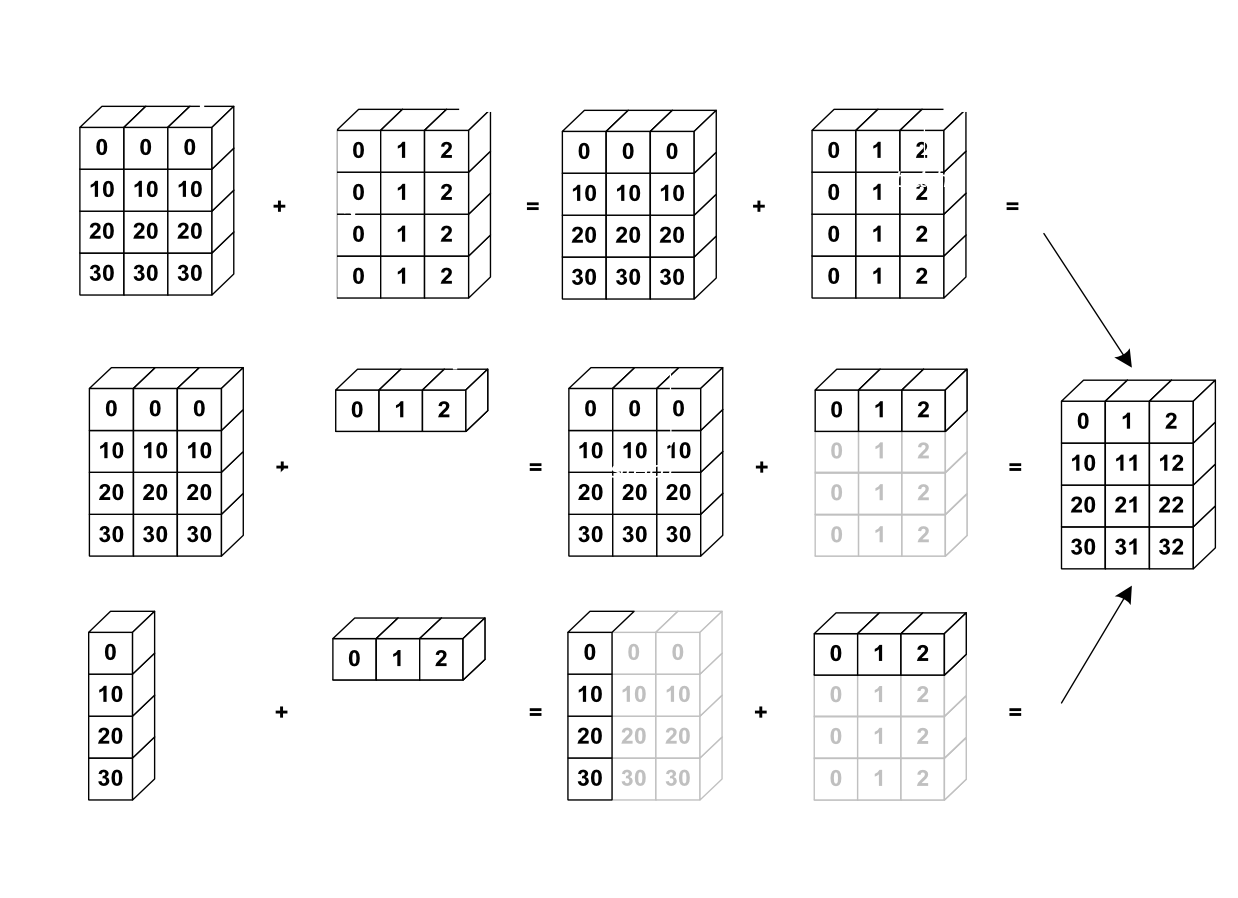</img>

我们来验证一下：

In [126]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [127]:
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

我们其实已经在不知情的时候使用过broadcasting！：

In [128]:
a = np.ones((4, 5))
a[0] = 2  # 将一个维度为0的array赋值到一个维度为1的array
a

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [129]:
a = np.ones((4, 5))
print(a[0])
a[0] = 2  # 我们将一个array的维度0分配给另一个array的维度
a

[ 1.  1.  1.  1.  1.]


array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

一个有用的技巧：

In [130]:
a = np.arange(0, 40, 10)
a.shape

(4,)

In [131]:
a = a[:, np.newaxis]  # 添加一个新的轴 -> 2D array
a.shape

(4, 1)

In [132]:
a

array([[ 0],
       [10],
       [20],
       [30]])

In [133]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

broadcasting看起来有点神奇，不过，如果一个问题的输出数据是比输入数据有更高维度的array时，使用它是非常自然的。

**实例：broadcasting**

让我们创建一个66号公路上城市间距离的array（单位为mile）：芝加哥、斯普林菲尔德、圣路易斯、塔尔萨、俄克拉何马市、阿马里洛、圣塔菲、阿尔布开克、Flagstaff、洛杉矶。

In [134]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

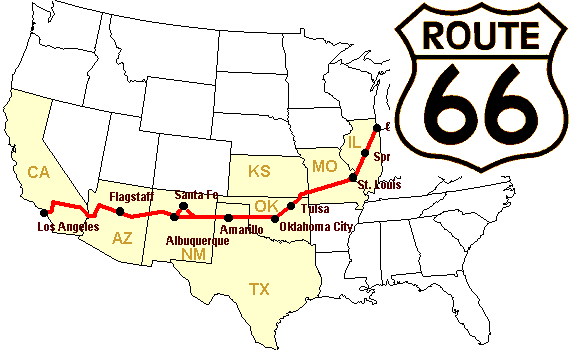</img>

许多基于网格或者网络的问题都需要使用broadcasting。例如，如果要计算10X10网格中每个点到原点的数据，可以这样：

In [135]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

或者用颜色：

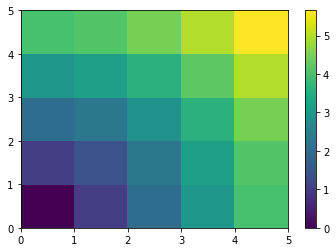

In [136]:
plt.pcolor(distance)    
plt.colorbar()   

**评论** : ``numpy.ogrid()`` 函数允许直接创建上前例中作为两个**重要维度**的向量`x`和`y`：

In [137]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [138]:
x.shape, y.shape

((5, 1), (1, 5))

In [139]:
distance = np.sqrt(x ** 2 + y ** 2)

因此，当我们需要进行网格计算时, ``np.ogrid`` 非常有用。另一方面，函数``np.mgrid``直接提供了由有完整index的矩阵，可用于我们无法（或不想）使用broadcasting的情形。

In [140]:
x, y = np.mgrid[0:4, 0:4]
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [141]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

#### 1.3.2.4 array形状操控

##### flatten(扁平化)

In [142]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [143]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [144]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

对于高维array，维度数最高的"先"拆除.

##### reshape(重设形状)

可以是与扁平化的反向操作：

In [145]:
a.shape

(2, 3)

In [146]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

也可以是,

In [147]:
a.reshape((2, -1))    # 当某维度的值不确定时，设为-1，则该值将被自动推导出来

array([[1, 2, 3],
       [4, 5, 6]])

**警示**： `ndarray.reshape` 可以返回一个view（参见 `help(np.reshape)`）, 也可以可以返回copy(副本)

In [148]:
b[0, 0] = 99
a

array([[99,  2,  3],
       [ 4,  5,  6]])

当心：重排也可以返回一个副本！：

In [149]:
a = np.zeros((3, 2))
b = a.T.reshape(3*2)
b[0] = 9
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

要理解这个现象，你需要了解更多关于numpy array内存布局的知识。

##### 增加维度

用 ``np.newaxis``对象进行索引可以为一个array添加轴（在前面关于broadcasting的部分你已经见过）：

In [150]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [151]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [152]:
z[np.newaxis, :]

array([[1, 2, 3]])

##### 维度的重排

In [153]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a.shape

(4, 3, 2)

In [154]:
a[0, 2, 1]

5

In [155]:
b = a.transpose(1, 2, 0)
b.shape

(3, 2, 4)

In [156]:
b[2, 1, 0]

5

这也是创建了一个view：

In [157]:
b[2, 1, 0] = -1
a[0, 2, 1]

-1

##### 改变大小

可以用 ``ndarray.resize`` 改变array的大小：

In [158]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

但是，它不能在其他地方引用：

In [159]:
b = a
a.resize((4,))  

ValueError: cannot resize an array that references or is referenced
by another array in this way.  Use the resize function

### **练习：形状操控**
* 查看 `reshape` 的文档，特别是其中的notes一节，有关于copy(副本)和view(视图)的信息.
* 尝试用 `flatten` 作为 `ravel`的替代。两者有什么区别？ (提示: 检查一下哪个返回的是view，哪个返回的是copy).
* 实验用 `transpose` 进行维度重排.

#### 1.3.2.5 数据排序

* 沿某个轴排序：

In [160]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

**注**：各行独立进行排序！

* in-place(就地)排序：

In [161]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

* 用fancy index排序：

In [162]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0], dtype=int64)

In [163]:
a[j]

array([1, 2, 3, 4])

* 找到最大值和最小值：

In [164]:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)

### **练习：排序**
* 尝试in-place排序和非in-place排序.
* 尝试用不同的数据类型创建array并排序.
* 用 ``all`` 或者 ``array_equal`` 来检查结果.
* 查看`np.random.shuffle`，这是一种更快地创建用于可排序输入的方法
* 结合使用`ravel`, `sort` 和 `reshape`.
* 查看`sort`函数的`axis`关键字，重新完成上面的练习.

#### 1.3.2.6 总结

**入门你需要知道什么？**
* 知道如何创建array：`array`, `arange`, `ones`, `zeros`.
* 知道用 `array.shape` 得到array的形状，然后使用slice来获得array的不同视图：`array[::2]`等; 用 `reshape`改变array形状或者用 `ravel`将它扁平化.
* 获取array元素的一个子集，和/或用mask修改他们的值

```python
>>> a[a < 0] = 0
```

* 知道array上的各种操作，比如找到均值或最大值 (`array.max()`, `array.mean()`)。不需要记住所有东西，但是应该有条件反射去搜索文档(线上文档, `help()`, `lookfor()`)!!
* 更高级的用法：掌握利用整型数组索引，以及broadcasting。了解更多的Numpy函数以处理各种array操作。

**快读阅读**

如果你想要快速通过科学讲座笔记来学习生态系统，你可以直接跳到下一章：Matplotlib: 作图(暂缺)。

作为概述，本章剩下的内容对于不是必须的。但是，记得回来完成本章并且完成更多的练习。

### 1.3.3 关于array的更多阐述

#### 1.3.3.1 更多的数据类型

##### casting(转型)

“较大”的类型在有混合类型的操作中胜出：

In [165]:
np.array([1, 2, 3]) + 1.5

array([ 2.5,  3.5,  4.5])

赋值从来不会改变类型！

In [166]:
a = np.array([1, 2, 3])
a.dtype

dtype('int32')

In [167]:
a[0] = 1.9     # <-- 浮点被截取为整数
a

array([1, 2, 3])

强制cast(转换类型)：

In [168]:
a = np.array([1.7, 1.2, 1.6])
b = a.astype(int)  # <-- 截取整数
b

array([1, 1, 1])

四舍五入：

In [169]:
a = np.array([1.2, 1.5, 1.6, 2.5, 3.5, 4.5])
b = np.around(a)
b                    # 仍然为浮点

array([ 1.,  2.,  2.,  2.,  4.,  4.])

In [170]:
c = np.around(a).astype(int)
c

array([1, 2, 2, 2, 4, 4])

##### 不同数据类型的大小

整数 (带有符号):

|类型	|字节数|
|-------|------|
|int8	|8 bits|
|int16	|16 bits|
|int32	|32 bits (与32位平台的int相同)|
|int64	|64 bits (与64位平台的int相同)|

In [171]:
np.array([1], dtype=int).dtype

dtype('int32')

In [172]:
np.iinfo(np.int32).max, 2**31 - 1

(2147483647, 2147483647)

In [173]:
np.iinfo(np.int64).max, 2**63 - 1

(9223372036854775807, 9223372036854775807)

无符号整数:

类型|字节数
-|-
uint8|8 bits
uint16|16 bits
uint32|32 bits
uint64|64 bits

In [174]:
np.iinfo(np.uint32).max, 2**32 - 1

(4294967295, 4294967295)

In [175]:
np.iinfo(np.uint64).max, 2**64 - 1

(18446744073709551615, 18446744073709551615)

浮点数据：

类型|字节数
-|-
float16|16 bits
float32|32 bits
float64|64 bits (与浮点相同)
float96|96 bits, 平台依赖 (与 `np.longdouble` 相同)
float128|128 bits, 平台依赖 (与 `np.longdouble`相同)

In [176]:
np.finfo(np.float32).eps

1.1920929e-07

In [177]:
np.finfo(np.float64).eps

2.2204460492503131e-16

In [178]:
np.float32(1e-8) + np.float32(1) == 1

True

In [179]:
np.float64(1e-8) + np.float64(1) == 1

False

浮点复数：

类型|字节数
-|-
complex64|两个 32-bit 浮点
complex128|两个 64-bit 浮点
complex192|两个 96-bit 浮点, 平台依赖
complex256|两个 128-bit 浮点, 平台依赖

**更小的数据类型**

如果你不知道需要特殊数据类型，那你可能就不需要。

如果使用 `float32`，而不是`float64`，则：
* 一半的内存和磁盘存储空间
* 需要的内存通道带宽减半（可能在某些操作中会稍快一点）

In [180]:
#a = np.zeros((1e6,), dtype=np.float64)
#b = np.zeros((1e6,), dtype=np.float32)
#%timeit a*a

In [181]:
#%timeit b*b

* 但是更大的四舍五入误差 - 有时在一些令人惊喜的地方（即，不要使用它们除非你真的需要）

#### 1.3.3.2 结构化的数据类型

名称|类型
-|-
sensor_code|(4个字母的字符)
position|(浮点)
value|(浮点)

In [182]:
samples = np.zeros((6,), dtype=[('sensor_code', 'S4'),('position', float), ('value', float)])
samples.ndim

1

In [183]:
samples.shape

(6,)

In [184]:
samples.dtype.names

('sensor_code', 'position', 'value')

In [185]:
samples[:] = [('ALFA',   1, 0.37), ('BETA', 1, 0.11), ('TAU', 1,   0.13),('ALFA', 1.5, 0.37), ('ALFA', 3, 0.11),
              ('TAU', 1.2, 0.13)]
samples

array([(b'ALFA',  1. ,  0.37), (b'BETA',  1. ,  0.11),
       (b'TAU',  1. ,  0.13), (b'ALFA',  1.5,  0.37),
       (b'ALFA',  3. ,  0.11), (b'TAU',  1.2,  0.13)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

用字段名称索引也可以访问字段：

In [186]:
samples['sensor_code']

array([b'ALFA', b'BETA', b'TAU', b'ALFA', b'ALFA', b'TAU'],
      dtype='|S4')

In [187]:
samples['value']

array([ 0.37,  0.11,  0.13,  0.37,  0.11,  0.13])

In [188]:
samples[0]

(b'ALFA',  1.,  0.37)

In [189]:
samples[0]['sensor_code'] = 'TAU'
samples[0]

(b'TAU',  1.,  0.37)

一次多个字段：

In [190]:
samples[['position', 'value']]

array([( 1. ,  0.37), ( 1. ,  0.11), ( 1. ,  0.13), ( 1.5,  0.37),
       ( 3. ,  0.11), ( 1.2,  0.13)],
      dtype=[('position', '<f8'), ('value', '<f8')])

和普通情况一样，fancy索引也有效：

In [191]:
samples[samples['sensor_code'] == 'ALFA']

array([], shape=(0, 6),
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

**注**：构建结构化array有需要其他的语言，见[这里](http://docs.scipy.org/doc/numpy/user/basics.rec.html)和[这里](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html#specifying-and-constructing-data-types)。

#### 1.3.3.3 遮盖array（maskedarray）: 处理缺失值（的传播）

* 对于浮点不能用NaN，但是mask对所有类型都适用：

In [192]:
x = np.ma.array([1, 2, 3, 4], mask=[0, 1, 0, 1])
x

masked_array(data = [1 -- 3 --],
             mask = [False  True False  True],
       fill_value = 999999)

In [193]:
y = np.ma.array([1, 2, 3, 4], mask=[0, 1, 1, 1])
x + y

masked_array(data = [2 -- -- --],
             mask = [False  True  True  True],
       fill_value = 999999)

* 通用函数的mask版本：

In [194]:
np.ma.sqrt([1, -1, 2, -2])

masked_array(data = [1.0 -- 1.4142135623730951 --],
             mask = [False  True False  True],
       fill_value = 1e+20)

**注**：有许多其他array的[兄弟姐妹](2.2. 高级Numpy.ipynb)

-----
尽管这脱离了Numpy这章的主题，让我们花点时间回忆一下编写代码的最佳实践，从长远角度这绝对是值得的：

**最佳实践**
* 明确的变量名（不需要备注去解释变量里是什么）
* 风格：逗号后及＝周围有空格等。

    在[Python代码风格指南](http://www.python.org/dev/peps/pep-0008)及[文档字符串惯例](http://www.python.org/dev/peps/pep-0257)页面中给出了相当数据量如何书写“漂亮代码”的规则（并且，最重要的是，与其他人使用相同的惯例!）。
* 除非在一些极特殊的情况下，变量名及备注用英文。

### 1.3.4 高级操作

1.3.4.1. 多项式

Numpy也包含不同基的多项式：

例如，$3x^2 + 2x - 1$:

In [195]:
p = np.poly1d([3, 2, -1])
p(0)

-1

In [196]:
p.roots

array([-1.        ,  0.33333333])

In [197]:
p.order

2

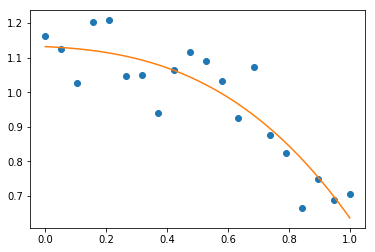

In [198]:
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 3))
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-') 

更多内容见http://docs.scipy.org/doc/numpy/reference/routines.polynomials.poly1d.html。

##### 更多多项式（有更多的基）

Numpy也有更复杂的多项式接口，支持比如切比雪夫基。

\\(3x^2 + 2x - 1\\):

In [199]:
p = np.polynomial.Polynomial([-1, 2, 3]) # 系数的顺序不同！
p(0)

-1.0

In [200]:
p.roots()

array([-1.        ,  0.33333333])

In [201]:
p.degree()  # 在普通的多项式中通常不暴露'order'

2

在切尔雪夫基中使用多项式的例子，多项式的范围在[-1,1]：

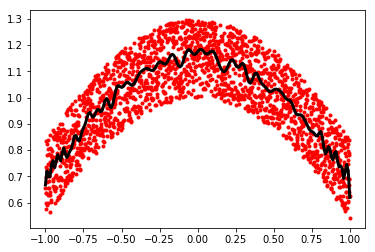

In [202]:
x = np.linspace(-1, 1, 2000)
y = np.cos(x) + 0.3*np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)
t = np.linspace(-1, 1, 200)
plt.plot(x, y, 'r.')  
plt.plot(t, p(t), 'k-', lw=3) 

切尔雪夫多项式在插入方面有很多优势。

#### 1.3.4.2 加载数据文件

##### 文本文件

例子: [populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt):

```
# year  hare    lynx    carrot
1900    30e3    4e3     48300
1901    47.2e3  6.1e3   48200
1902    70.2e3  9.8e3   41500
1903    77.4e3  35.2e3  38200
```

In [203]:
data = np.loadtxt('data/populations.txt')
data

array([[  1900.,  30000.,   4000.,  48300.],
       [  1901.,  47200.,   6100.,  48200.],
       [  1902.,  70200.,   9800.,  41500.],
       [  1903.,  77400.,  35200.,  38200.],
       [  1904.,  36300.,  59400.,  40600.],
       [  1905.,  20600.,  41700.,  39800.],
       [  1906.,  18100.,  19000.,  38600.],
       [  1907.,  21400.,  13000.,  42300.],
       [  1908.,  22000.,   8300.,  44500.],
       [  1909.,  25400.,   9100.,  42100.],
       [  1910.,  27100.,   7400.,  46000.],
       [  1911.,  40300.,   8000.,  46800.],
       [  1912.,  57000.,  12300.,  43800.],
       [  1913.,  76600.,  19500.,  40900.],
       [  1914.,  52300.,  45700.,  39400.],
       [  1915.,  19500.,  51100.,  39000.],
       [  1916.,  11200.,  29700.,  36700.],
       [  1917.,   7600.,  15800.,  41800.],
       [  1918.,  14600.,   9700.,  43300.],
       [  1919.,  16200.,  10100.,  41300.],
       [  1920.,  24700.,   8600.,  47300.]])

In [204]:
np.savetxt('pop2.txt', data)
data2 = np.loadtxt('pop2.txt')

**注**：如果你有一个复杂的文本文件，应该尝试：
* `np.genfromtxt`
* 使用Python的I/O函数和例如正则式来解析（Python特别适合这个工作）

**提示：用IPython在文件系统中航行**

In [205]:
pwd      # 显示当前目录

'E:\\git-trial\\course\\scipy-lecture-notes_cn'

In [206]:
cd data

E:\git-trial\course\scipy-lecture-notes_cn\data


In [207]:
ls

 驱动器 E 中的卷是 硬盘
 卷的序列号是 E0D5-1873

 E:\git-trial\course\scipy-lecture-notes_cn\data 的目录

2017/11/30  09:54    <DIR>          .
2017/11/30  09:54    <DIR>          ..
2017/11/29  15:33           108,883 elephant.png
2017/11/29  15:33               576 LICENCE.txt
2017/11/29  15:33               164 max-speeds.npy
2017/11/29  15:33           216,481 moonlanding.png
2017/11/29  15:33           164,418 MV_HFV_012.jpg
2017/11/29  15:33               154 organisms.txt
2017/11/29  15:33               547 populations.txt
2017/11/29  15:33                65 species.txt
2017/11/29  15:33               591 test.png
2017/11/29  15:33            17,410 test.wav
2017/11/29  15:33               591 test2.png
2017/11/29  15:33               160 waveform_1.npy
2017/11/29  15:33               160 waveform_2.npy
2017/11/29  15:33               683 women_percentage.txt
              14 个文件        510,883 字节
               2 个目录 167,322,484,736 可用字节


##### 图像

使用Matplotlib：

In [208]:
img = plt.imread('data/elephant.png')
img.shape, img.dtype

FileNotFoundError: [Errno 2] No such file or directory: 'data/elephant.png'

In [ ]:
plt.imshow(img)

In [ ]:
plt.savefig('plot.png')
plt.imsave('red_elephant', img[:,:,0], cmap=plt.cm.gray)

这只保存了一个渠道（RGB）：

In [ ]:
plt.imshow(plt.imread('red_elephant.png')) 

其他包：

In [ ]:
from scipy.misc import imsave
imsave('tiny_elephant.png', img[::6,::6])
plt.imshow(plt.imread('tiny_elephant.png'), interpolation='nearest')

##### Numpy的自有格式

Numpy有自有的二进制格式，没有便携性但是I/O高效：

In [ ]:
data = np.ones((3, 3))
np.save('pop.npy', data)
data3 = np.load('pop.npy')

##### 知名的（并且更复杂的）文件格式

* HDF5: [h5py](http://code.google.com/p/h5py/), [PyTables](http://pytables.org/)
* NetCDF: `scipy.io.netcdf_file`, [netcdf4-python](http://code.google.com/p/netcdf4-python/), ...
* Matlab: `scipy.io.loadmat`, `scipy.io.savemat`
* MatrixMarket: `scipy.io.mmread`, `scipy.io.mmread`

... 如果有人使用，那么就可能有一个对应的Python库。

**练习：文本数据文件**

写一个Python脚本从[populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt)加载数据，删除前五行和后五行。将这个小数据集存入 `pop2.txt`。

**Numpy内部**

如果你对Numpy的内部感兴趣, 有一个关于[Advanced Numpy](http://scipy-lectures.github.io/advanced/advanced_numpy/index.html#advanced-numpy)的很好的讨论。

### 1.3.5 一些练习

#### 1.3.5.1 array操作

* 从2D array（不需要显示的输入）:

```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```

并且生成一个第二和第四行的新array。 

* 将array a的每一列以元素的方式除以array b (提示: `np.newaxis`): 

In [ ]:
a = np.arange(25).reshape(5, 5)
b = np.array([1., 5, 10, 15, 20])

* 难一点的题目：创建10 X 3的随机数array （在[0, 1]的范围内）。对于每一行，挑出最接近0.5的数。
    * 用 `abs`和 `argsort`找到每一行中最接近的列 `j`。
    * 使用fancy索引抽取数字。（提示：a[i,j] - array `i` 必须包含 `j` 中成分的对应行数）
    
#### 1.3.5.2 图片操作：给Lena加边框

让我们从著名的Lena图（http://www.cs.cmu.edu/~chuck/lennapg/） 上开始，用Numpy array做一些操作。Scipy在 `scipy.lena`函数中提供了这个图的二维array：

In [ ]:
from scipy import misc
lena = misc.lena()

**注**：在旧版的scipy中，你会在 `scipy.lena()`找到lena。

这是一些通过我们的操作可以获得图片：使用不同的颜色地图，裁剪图片，改变图片的一部分。

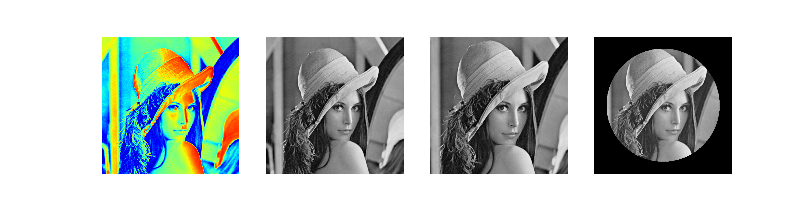</img>

* 让我们用pylab的``imshow``函数显示这个图片。

In [ ]:
import pylab as plt
lena = misc.lena()
plt.imshow(lena)

* Lena然后以为色彩显示。要将她展示为灰色需要指定一个颜色地图。

In [ ]:
plt.imshow(lena, cmap=plt.cm.gray)

* 用一个更小的图片中心来创建array：例如，从图像边缘删除30像素。要检查结果，用 `imshow` 显示这个新array。

In [ ]:
crop_lena = lena[30:-30,30:-30]

* 现在我们为Lena的脸加一个黑色项链形边框。要做到这一点，需要创建一个mask对应于需要变成黑色的像素。这个mask由如下条件定义 `(y-256)**2 + (x-256)**2`

In [ ]:
y, x = np.ogrid[0:512,0:512] # x 和 y 像素索引
y.shape, x.shape

In [ ]:
centerx, centery = (256, 256) # 图像中心
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2 # 圆形

接下来我们为mask对应的图片像素赋值为0。语句非常简单并且直觉化：

In [ ]:
lena[mask] = 0
plt.imshow(lena)

* 接下来：将这个练习的所有命令复制到 `lena_locket.py` 脚本中，并且在IPython中用 `%run lena_locket.py`执行这个脚本，将圆形改为椭圆。

#### 1.3.5.3 数据统计

[populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt)中的数据描述了野兔和猞猁（以及胡萝卜）在加拿大北部过去十年的数量：

In [ ]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T  # 技巧: 列到变量
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

根据[populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt)中的数据计算并打印...

1. 每个物种在这个时间段内的数量平均数及标准差。
2. 每个物种在哪一年数量最多。
3. 每一年哪个物种数量最多。（提示：`np.array(['H', 'L', 'C'])`的`argsort` 和fancy索引）
4. 哪一年数量超过50000。（提示：比较和 `np.any`）
5. 每个物种有最少数量的两年。（提示： `argsort`、fancy索引）
6. 比较（作图）野兔和猞猁总量的变化（看一下 `help(np.gradient)`）。看一下相关（见 `help(np.corrcoef)`）。

... 所有都不应该使用for循环。

答案：[Python源文件](http://scipy-lectures.github.io/_downloads/2_2_data_statistics.py)

#### 1.3.5.4 粗略积分估计

写一个函数  ``f(a, b, c)`` 返回$a^b - c$。构造一个`24x12x6` array，其值参数范围为[0,1] x [0,1] x [0,1]。

接近的3-D积分

$$\int_0^1\int_0^1\int_0^1(a^b-c)da\,db\,dc$$

在这个体积之上有相同的平均数。准确的结果是$\ln 2 -
\frac{1}{2}\approx0.1931\ldots$... - 你的相对误差是多少？

（技巧：使用元素级别的操作和广播。你可以用 `np.ogrid` 获得在 `np.ogrid[0:1:20j]` 范围内的数据点。）

**提醒**Python函数：

In [ ]:
def f(a, b, c):
    return some_result

答案：[Python源文件](http://scipy-lectures.github.io/_downloads/2_3_crude_integration.py)

#### 1.3.5.5 Mandelbrot集合

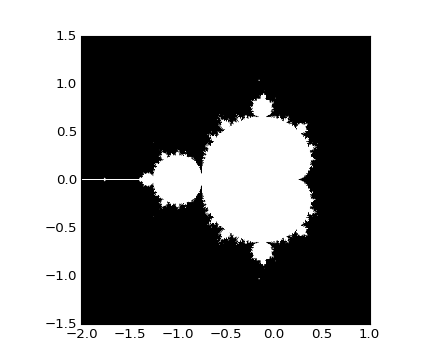</img>

写一个脚本计算Mandelbrot分形。Mandelbrot迭代

```python
N_max = 50
some_threshold = 50
c = x + 1j*y
for j in xrange(N_max):
    z = z**2 + c
```

点（x, y）属于Mandelbrot集合，如果|c| < some_threshold。

作如下计算：

* 构建一个网格 c = x + 1j\*y， 值在范围[-2, 1] x [-1.5, 1.5]
* 进行迭代
* 构建2-D bool mask标识输入集合中的点
* 用下列方法将结果保存到图片：

```python
import matplotlib.pyplot as plt
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5]) 
plt.gray()
plt.savefig('mandelbrot.png')
```

答案：[Python源文件](http://scipy-lectures.github.io/_downloads/2_4_mandelbrot.py)

#### 1.3.5.6 马尔科夫链

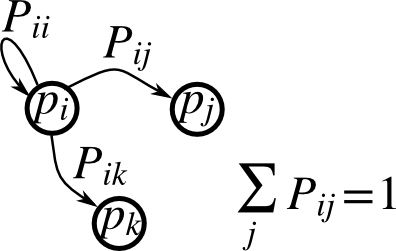</img>

马尔可夫链过渡矩阵P以及在状态p的概率分布：
1. `0 <= P[i,j] <= 1`：从状态i变化到j的概率
2. 过度规则： $p_{new} = P^T p_{old}$
3. `all(sum(P, axis=1) == 1)`, `p.sum() == 1`: 正态化

写一个脚本产生五种状态，并且：
* 构建一个随机矩阵，正态化每一行，以便它是过度矩阵。
* 从一个随机（正态化）概率分布`p`开始，并且进行50步=> `p_50`
* 计算稳定分布：P.T的特征值为1的特征向量（在数字上最接近1）=> `p_stationary`

记住正态化向量 - 我并没有...
* 检查一下 `p_50` 和 `p_stationary`是否等于公差1e-5

工具箱：`np.random.rand`、 `.dot()`、`np.linalg.eig`、reductions、`abs()`、`argmin`、comparisons、`all`、`np.linalg.norm`等。

答案：[Python源文件](http://scipy-lectures.github.io/_downloads/2_5_markov_chain.py)